In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [90]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [91]:
pruning='0.3'

In [92]:
bud_df = pd.read_csv('/Users/joelforster/Projects/optidb/clus/opti-bud.csv',names=['e','n','bud_number','size','bud_percentage','mean_budtime'])
net_df = pd.read_csv('/Users/joelforster/Projects/optidb/clus/opti-net'+pruning+'.csv',header=0)




In [93]:
len(net_df.columns.values.tolist())

22

In [94]:
cols = [x for i,x in enumerate(net_df.columns.values.tolist()) if i!=2 and i<18]

In [95]:
net_df = net_df.drop_duplicates(cols)

In [96]:
for c in bud_df.columns:
    bud_df[c] = bud_df[c].astype(float)
for c in net_df.columns:
    net_df[c] = net_df[c].astype(float)

In [97]:
# net_df.head(5)

In [98]:
criticalRegion = bud_df.query('bud_percentage > 0.2 & bud_percentage < 0.8 & e*n < 320')[['e','n']].values.tolist()
criticalNets = pd.DataFrame(columns=net_df.columns)
for c in criticalRegion:
    runNets = net_df[(net_df['Mean Affinity']==c[1]) & (net_df['Ligand Number']==c[0])]
    criticalNets = criticalNets.append(runNets)

In [99]:
print criticalRegion

[[20.0, 13.0], [20.0, 14.0], [21.0, 12.0], [21.0, 13.0], [21.0, 14.0], [22.0, 12.0], [22.0, 13.0], [22.0, 14.0], [23.0, 10.0], [23.0, 11.0], [23.0, 12.0], [23.0, 13.0], [24.0, 10.0], [24.0, 11.0], [24.0, 12.0], [24.0, 13.0], [25.0, 9.0], [25.0, 10.0], [25.0, 11.0], [25.0, 12.0], [26.0, 9.0], [26.0, 10.0], [26.0, 11.0], [27.0, 9.0], [27.0, 10.0], [28.0, 9.0], [28.0, 10.0], [29.0, 8.0], [29.0, 9.0], [30.0, 8.0], [30.0, 9.0], [31.0, 8.0], [31.0, 7.0], [32.0, 8.0], [32.0, 7.0], [33.0, 8.0], [33.0, 7.0], [34.0, 7.0], [35.0, 6.0], [35.0, 7.0], [36.0, 6.0], [37.0, 6.0], [38.0, 6.0], [39.0, 6.0], [40.0, 6.0], [42.0, 5.0], [43.0, 5.0], [44.0, 5.0], [45.0, 5.0], [46.0, 5.0], [50.0, 4.0], [51.0, 4.0], [52.0, 4.0], [53.0, 4.0], [54.0, 4.0]]


In [100]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()

In [101]:
meanBudNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Ligand Number']).mean().reset_index()
meanNonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Ligand Number']).mean().reset_index()

248.54545454545453 200.0 312.0 28.80013774071745


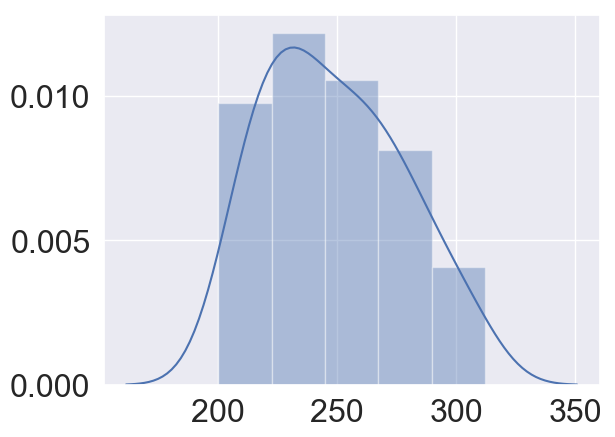

In [102]:
criticalEnergy = map(lambda x: x[0]*x[1],criticalRegion)
ax = sns.distplot(criticalEnergy)
print np.mean(criticalEnergy) , np.min(criticalEnergy), np.max(criticalEnergy),np.std(criticalEnergy)


In [103]:
bins = np.linspace(0, 100, 26)
print bins

digitisedLigandNum = np.digitize(budNets["Ligand Number"], bins)
binnedLigandNum = [budNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [nonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [budNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


In [104]:
def buildBinnedPlot(c):
    binnedBudC = [budNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedBudxErr = [b for b in [np.std(budNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [nonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
    binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    binnedNoBudxErr = [b for b in [np.std(nonbudNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    return binnedBudC,binnedBudxErr,binnedBudyErr,binnedNoBudC,binnedNoBudxErr,binnedNoBudyErr

In [105]:
def buildHistPlot(c,n):
    budPop = criticalNets[(criticalNets['Mean Budding Time'] > 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    nonBudPop = criticalNets[(criticalNets['Mean Budding Time'] < 0.0)&(criticalNets['Ligand Number']==float(n))][c].values.tolist()
    return budPop, nonBudPop
    

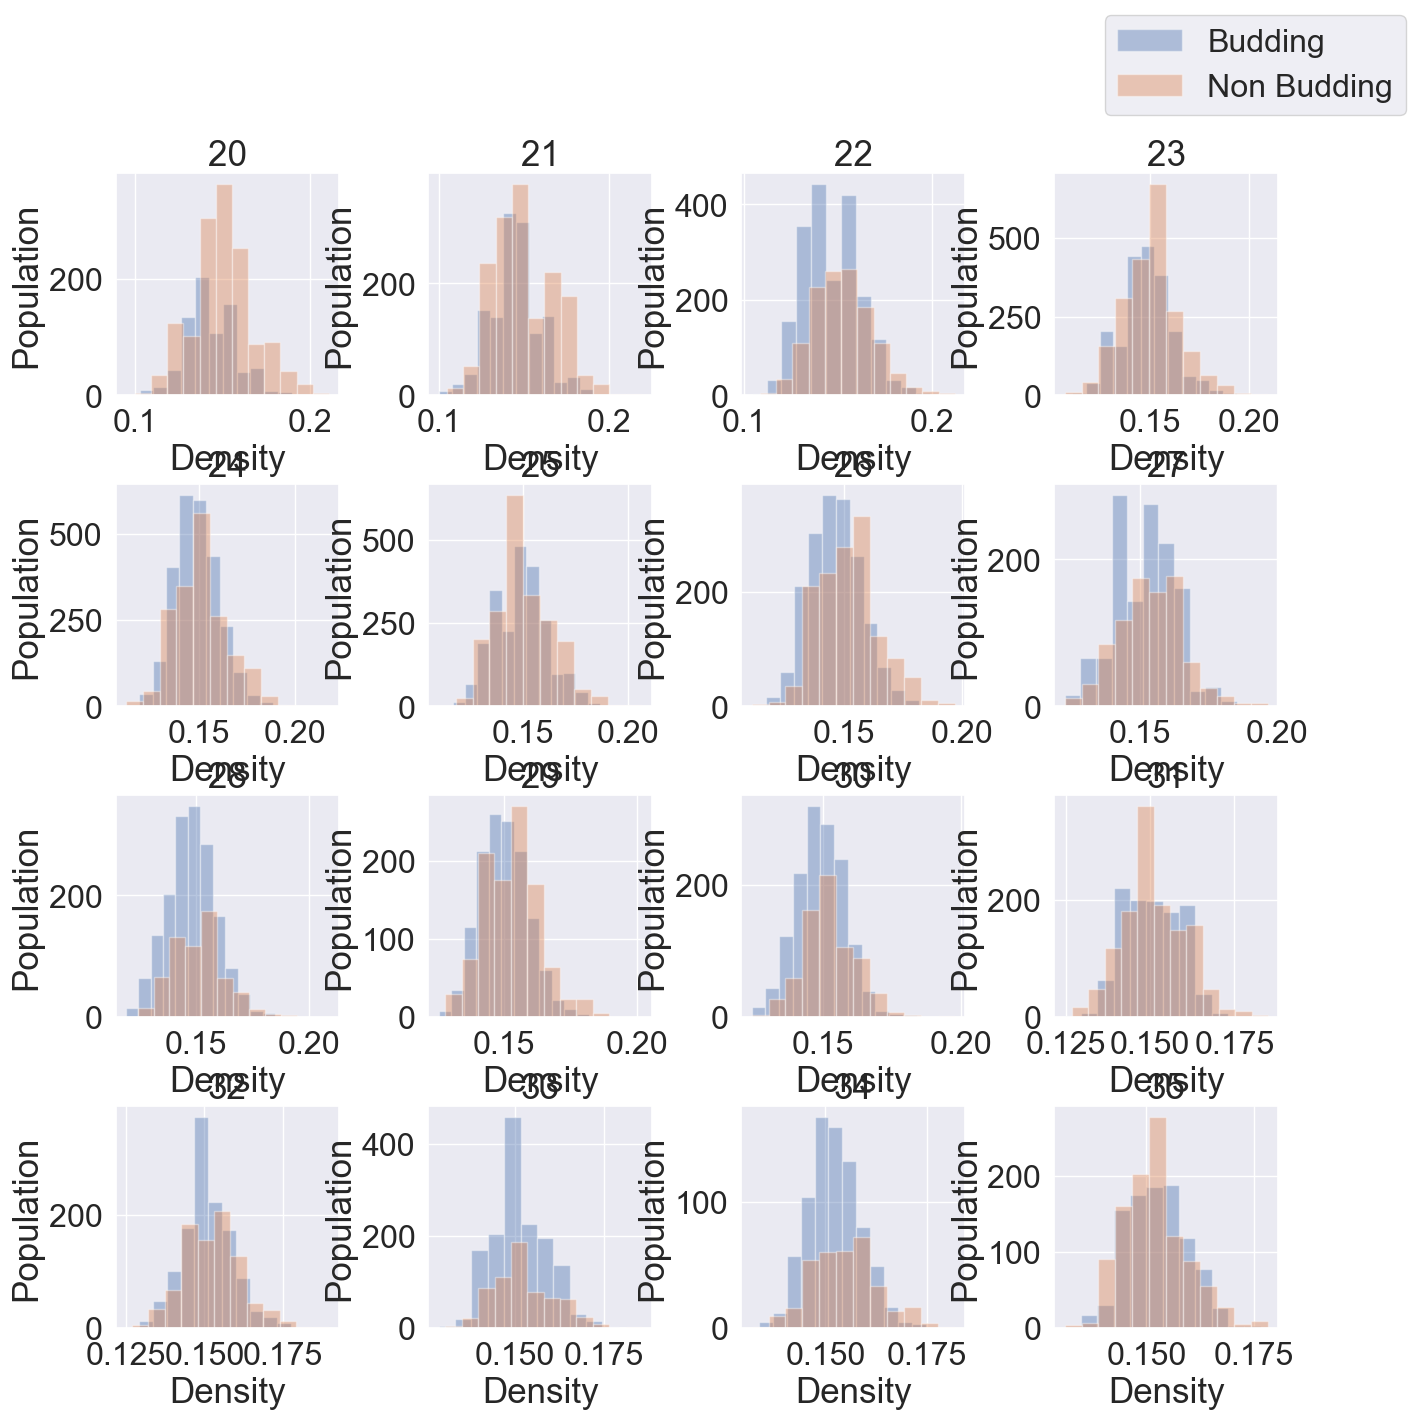

In [106]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
startI = 20
for i in range(startI,startI+16):
    ax = plt.subplot(4, 4, i-startI+1)
    r = buildHistPlot("Density",i)
    ax = sns.distplot(r[0],label="Budding",bins=12,kde=False)
    ax = sns.distplot(r[1],label="Non Budding",bins=12,kde=False)
    ax.set_xlabel("Density")
    ax.set_ylabel("Population")
    ax.set_title(i)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [107]:
labelSize=22
tickSize=20

In [148]:
def bigFig(c,label="NONE"):
    padding=0.025
    sns.set_style("white")
    if label=="NONE":
        label = c
    plt.figure(figsize=(12,7.5))
    ax = plt.subplot(111)

    r = [int(np.floor(min(budNets[c])*1000)), int(np.ceil(max(budNets[c])*1000)+1)]
    # for y in range(r[0],r[1]):    
    #     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

    xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+2))

    # for y in range(r[0],r[1]):    
    #     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    


    r = buildBinnedPlot(c)

#     plt.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
#     plt.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")

    plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding")
    
    if np.mean(r[3]) > 0.1:
        plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding")

    yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
    yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

    yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
    yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

    ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
    if np.mean(r[3]) > 0.1:
        ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)

    yr0 = np.min([yerrbud1,yerrbud2,yerrnobud1,yerrnobud2])*(1.0-padding)
    yr1 = np.max([yerrbud1,yerrbud2,yerrnobud1,yerrnobud2])*(1.0+padding)
    plt.ylabel(label,fontsize=labelSize)
    plt.xlabel("Ligand Number",fontsize=labelSize)
    plt.xticks(fontsize=tickSize)
    plt.yticks(fontsize=tickSize)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()   
#     ax.set_ylim(yr0,yr1)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
    plt.legend(loc='best',fontsize=labelSize)
    plt.savefig('/Users/joelforster/Projects/Figures/eps/'+label.replace(' ','-')+'-LigandNumber.eps', format='eps', dpi=1000)
    plt.savefig('/Users/joelforster/Projects/Figures/png/'+label.replace(' ','-')+'-LigandNumber.png')
    plt.savefig('/Users/joelforster/Projects/Figures/svg/'+label.replace(' ','-')+'-LigandNumber.svg', format='svg')
    plt.cla()
    plt.clf()

In [150]:
for c in budNets.columns:
    bigFig(c)


<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

<Figure size 1200x750 with 0 Axes>

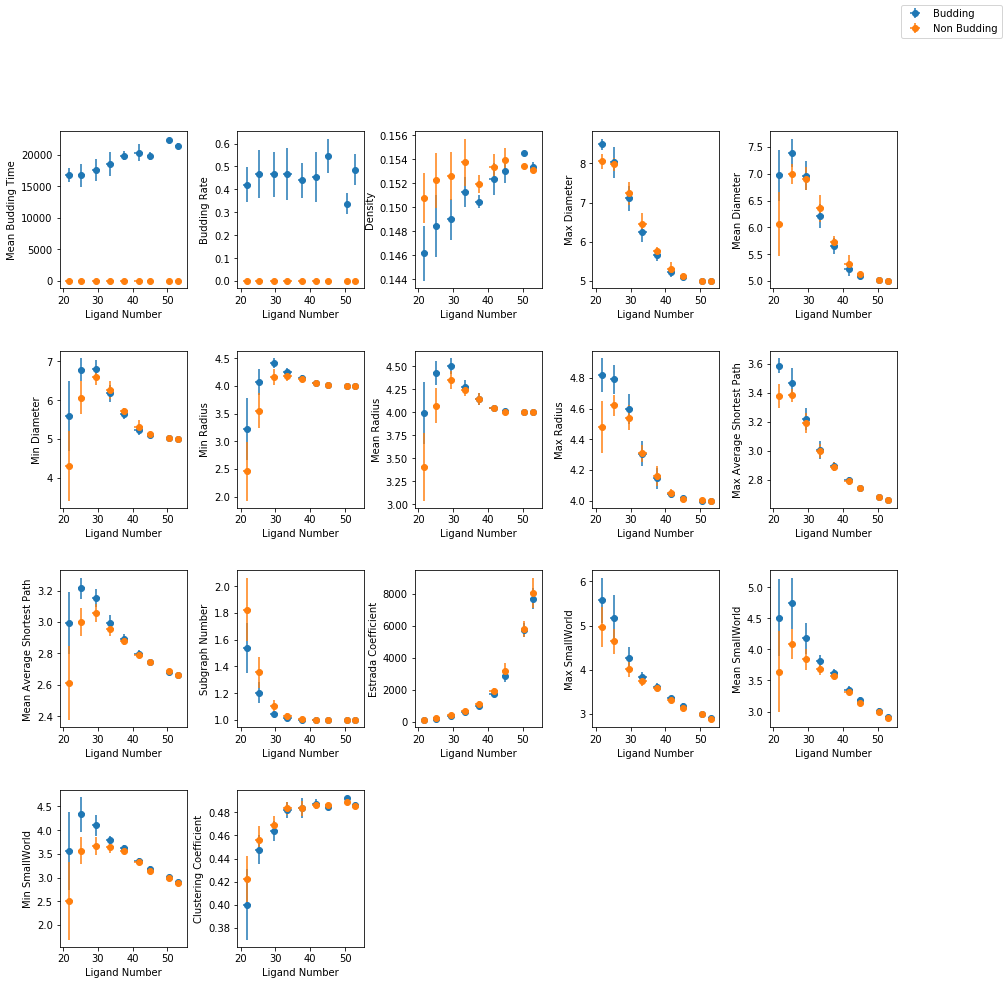

In [33]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 5, i)
#     binnedBudC = [budNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedBudyErr = [b for b in [np.std(budNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudxErr = [b for b in [np.std(budNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
#     binnedNoBudC = [nonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
#     binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
#     binnedNoBudyErr = [b for b in [np.std(nonbudNets[c][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
#     binnedNoBudxErr = [b for b in [np.std(nonbudNets["Ligand Number"][digitisedLigandNum == b]) for b in range(1, len(bins))]if not np.isnan(b)]
    r = buildBinnedPlot(c)
    ax.errorbar(binnedLigandNum,r[0],xerr=r[1],yerr=r[2],fmt='o',label="Budding")
    ax.errorbar(binnedNonBudLigandNum,r[3],yerr=r[5],xerr=r[4],fmt='o',label="Non Budding")
    #ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

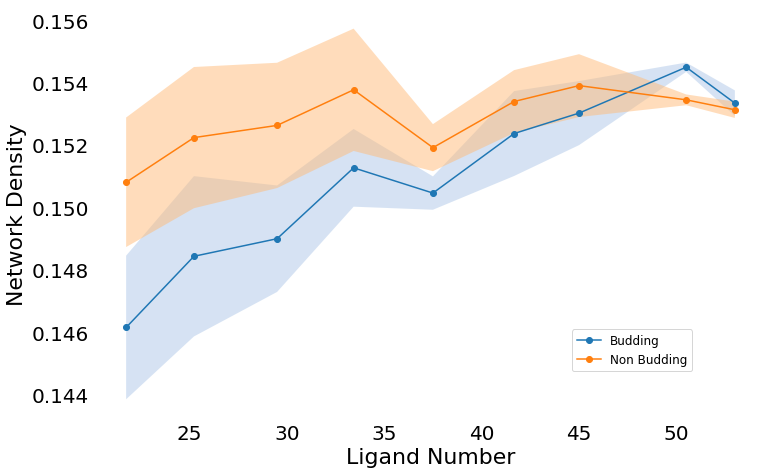

In [38]:
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)

r = [int(np.floor(min(budNets['Density'])*1000)), int(np.ceil(max(budNets['Density'])*1000)+1)]
# for y in range(r[0],r[1]):    
#     plt.plot(range(r[0],r[1]), [y] * len(range(r[0],r[1])), "--", lw=0.5, color="black", alpha=0.3)

xr = range(int(np.floor(min(budNets['Ligand Number']))-1), int(np.ceil(max(budNets['Ligand Number']))+2))

# for y in range(r[0],r[1]):    
#     plt.plot(xr, [y*0.001] * len(xr) , "--", lw=0.5, color="black", alpha=0.3)    
 
    
r = buildBinnedPlot("Density")

plt.errorbar(binnedLigandNum,r[0],fmt='-o',label="Budding")
plt.errorbar(binnedNonBudLigandNum,r[3],fmt='-o',label="Non Budding")

yerrbud1 = [e[0]-e[1] for e in  zip(r[0],r[2])]
yerrbud2 = [e[0]+e[1] for e in  zip(r[0],r[2])]

yerrnobud1 = [e[0]-e[1] for e in  zip(r[3],r[5])]
yerrnobud2 = [e[0]+e[1] for e in  zip(r[3],r[5])]

ax.fill_between(binnedLigandNum,yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.5)
ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)

    
# plt.plot(budNets["Ligand Number"],budNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(3))
# plt.plot(nonbudNets["Ligand Number"],nonbudNets['Density'],'.',label='_nolegend_',alpha=0.5,color=plt.get_cmap('tab20')(1))
# plt.plot(meanBudNets["Ligand Number"],meanBudNets['Density'],'s',label="Budding",color=plt.get_cmap('tab20')(2))
# plt.plot(meanNonbudNets["Ligand Number"],meanNonbudNets['Density'],'s',label="Non Budding",alpha=0.5,color=plt.get_cmap('tab20')(0))
plt.ylabel("Network Density",fontsize=labelSize)
plt.xlabel("Ligand Number",fontsize=labelSize)
plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.legend(loc='lower right',fontsize=12,bbox_to_anchor=(0.9, 0.1))
plt.savefig('/Users/joelforster/Projects/Figures/Density-LigandNumber.eps', format='eps', dpi=1000)
plt.savefig('/Users/joelforster/Projects/Figures/Density-LigandNumber.png')
plt.show()

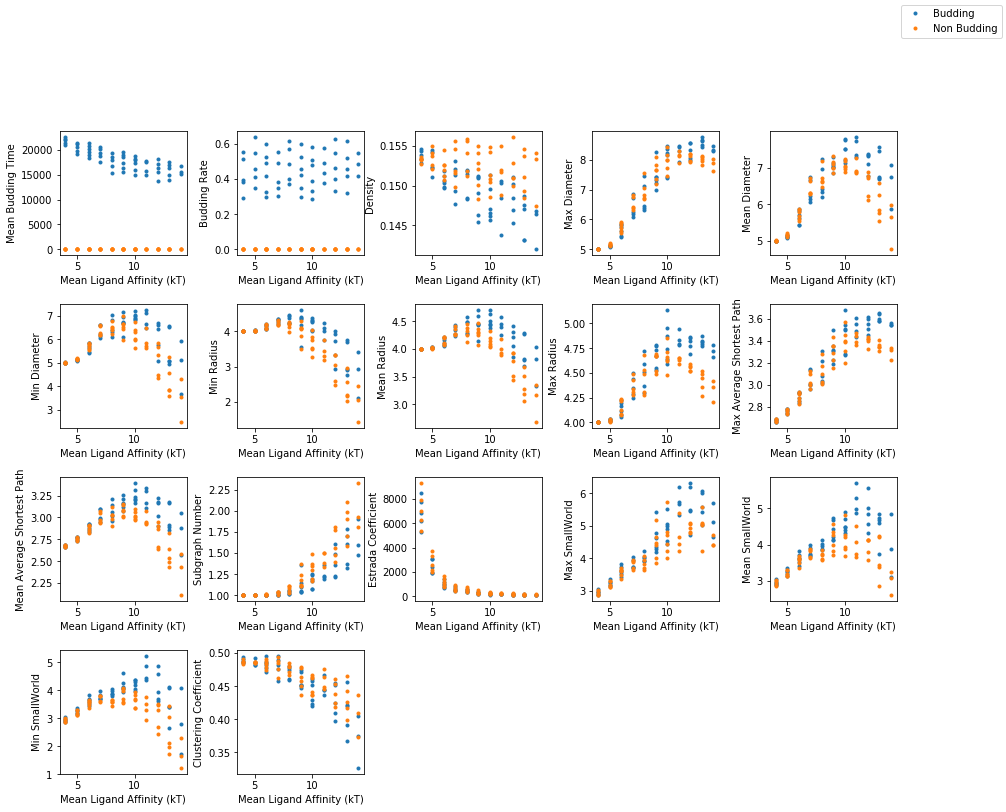

In [46]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 5, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

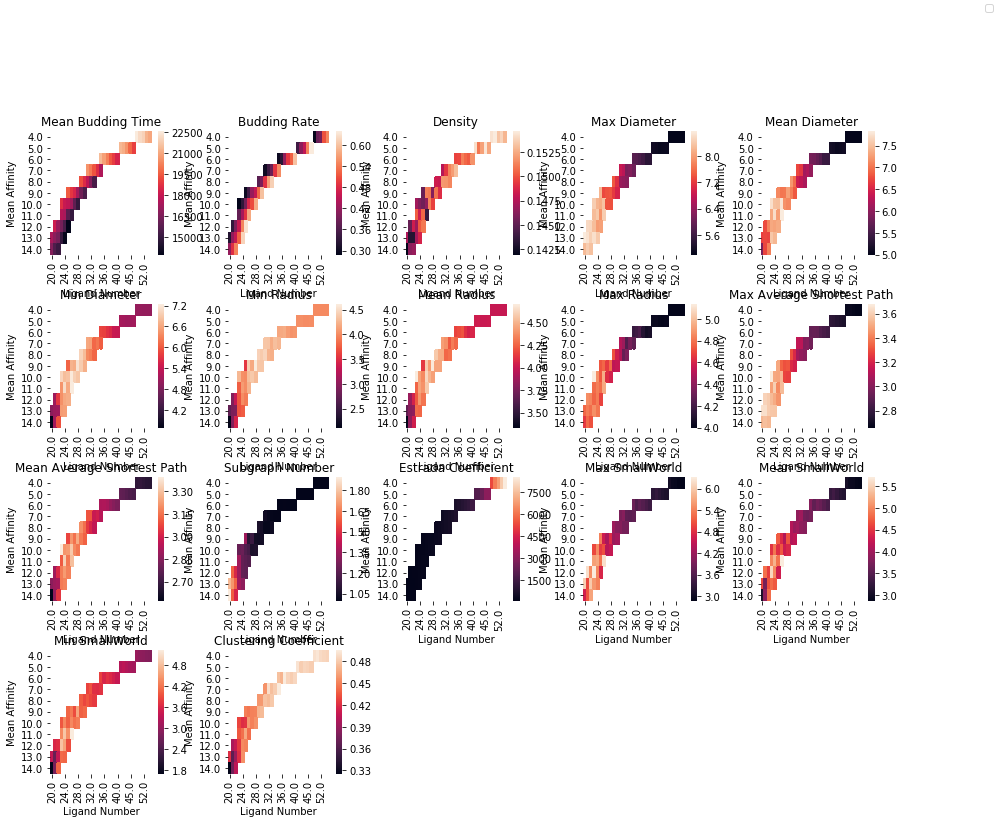

In [47]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 5, i)
    budNetsT = budNets.pivot("Mean Affinity", "Ligand Number", c)
    ax = sns.heatmap(budNetsT)
    ax.set_title(c)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

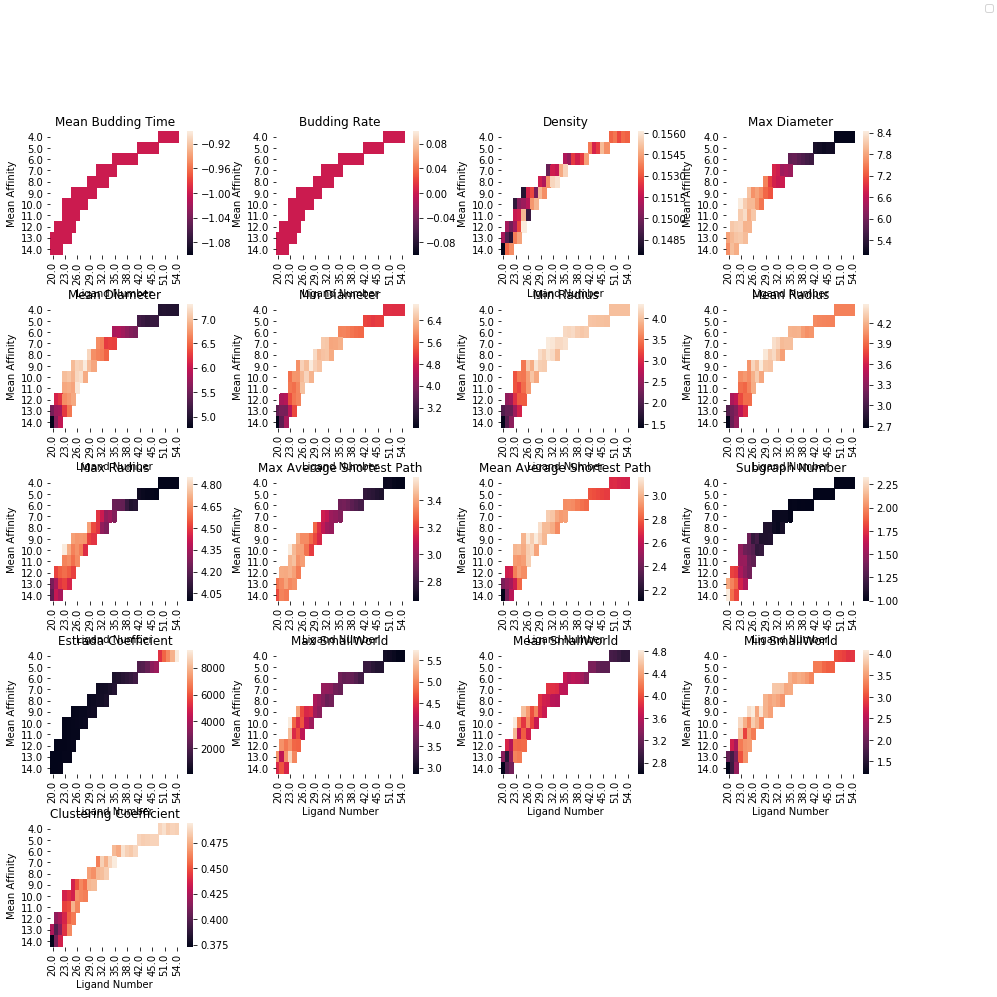

In [56]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    nonbudNetsT = nonbudNets.pivot("Mean Affinity", "Ligand Number", c)
    ax.set_title(c)
    ax = sns.heatmap(nonbudNetsT)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

In [49]:
bins = np.linspace(0, 100, 26)
print bins

digitisedLigandNum = np.digitize(meanBudNets["Ligand Number"], bins)
binnedLigandNum = [meanBudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedNonBudLigandNum = [meanNonbudNets["Ligand Number"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]
binnedBuddingRate = [meanBudNets["Budding Rate"][digitisedLigandNum == i].mean() for i in range(1, len(bins))]

binnedLigandNum = [b for b in binnedLigandNum if not np.isnan(b)]
binnedNonBudLigandNum = [b for b in binnedNonBudLigandNum if not np.isnan(b)]
binnedBuddingRate = [b for b in binnedBuddingRate if not np.isnan(b)]


[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


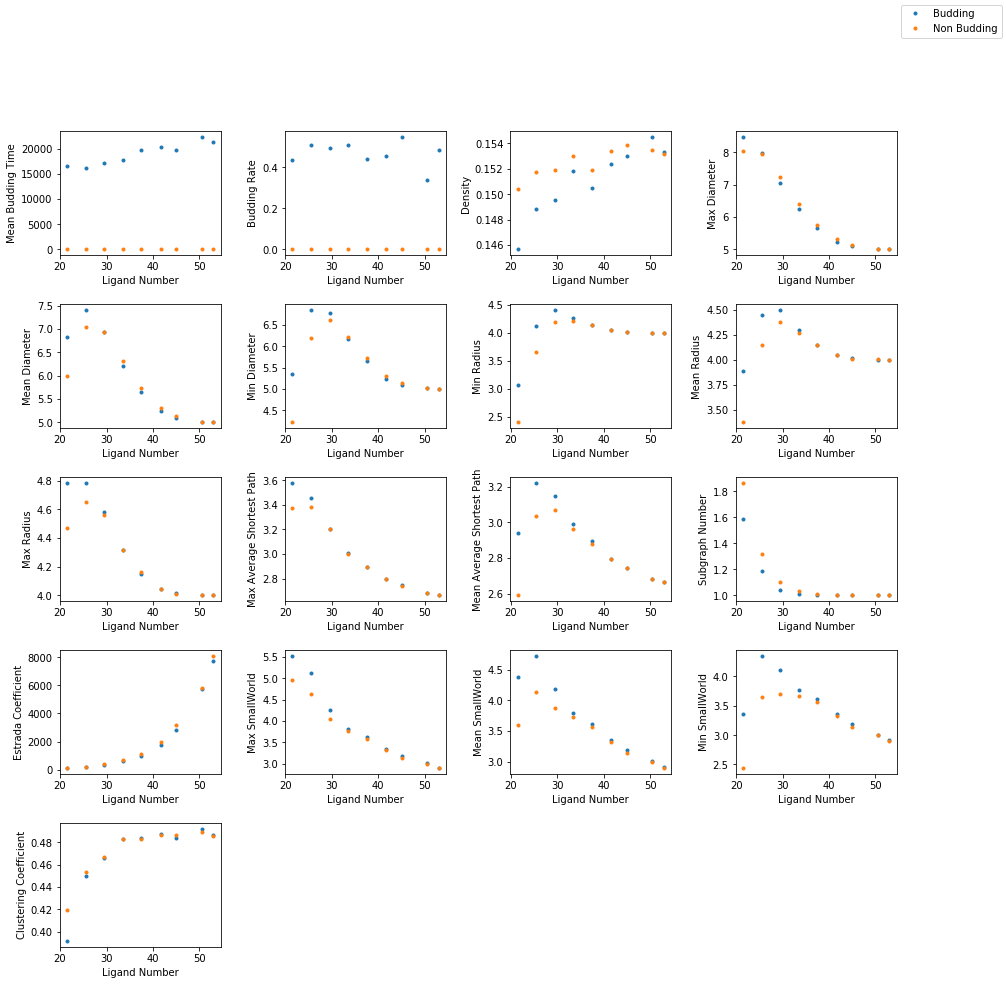

In [57]:
i = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in meanBudNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    binnedBudC = [meanBudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedBudC = [b for b in binnedBudC if not np.isnan(b)]
    binnedNoBudC = [meanNonbudNets[c][digitisedLigandNum == b].mean() for b in range(1, len(bins))]
    binnedNoBudC = [b for b in binnedNoBudC if not np.isnan(b)]
    ax.plot(binnedLigandNum,binnedBudC,'.',label="Budding")
    ax.plot(binnedNonBudLigandNum,binnedNoBudC,'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Ligand Number")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

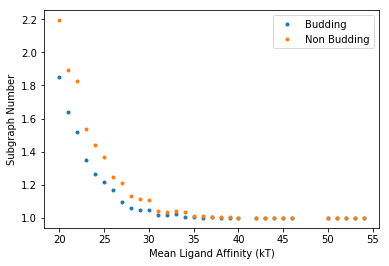

In [58]:
c = 'Subgraph Number'
plt.plot(meanBudNets['Ligand Number'],meanBudNets[c],'.',label="Budding")
plt.plot(meanNonbudNets['Ligand Number'],meanNonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [59]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity']).mean().reset_index()

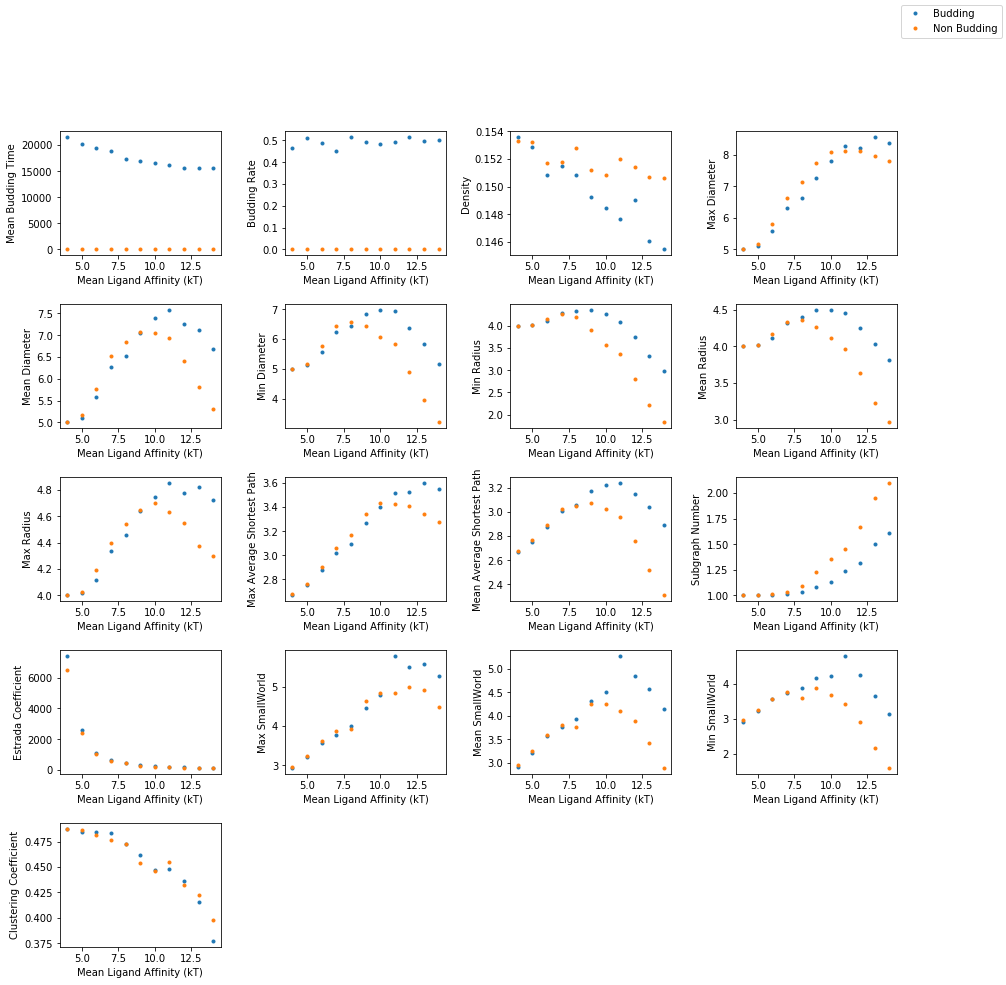

In [61]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(5, 4, i)
    ax.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
    plt.ylabel(c)
    plt.xlabel("Mean Ligand Affinity (kT)")
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

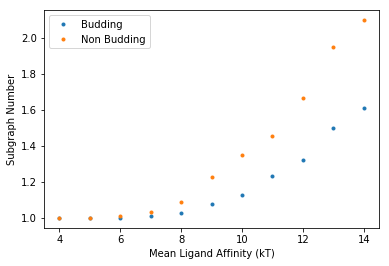

In [62]:
c = 'Subgraph Number'
plt.plot(budNets['Mean Affinity'],budNets[c],'.',label="Budding")
plt.plot(nonbudNets['Mean Affinity'],nonbudNets[c],'.',label="Non Budding")
plt.ylabel(c)
plt.xlabel("Mean Ligand Affinity (kT)")
plt.legend()
plt.show()

In [63]:
zoo_df = pd.read_csv('/Users/joel/Projects/golden/zoo.csv',names=['name','n','e','fitness','bud_rate','budtime'])

IOError: [Errno 2] File /Users/joel/Projects/golden/zoo.csv does not exist: '/Users/joel/Projects/golden/zoo.csv'

NameError: name 'zoo_df' is not defined

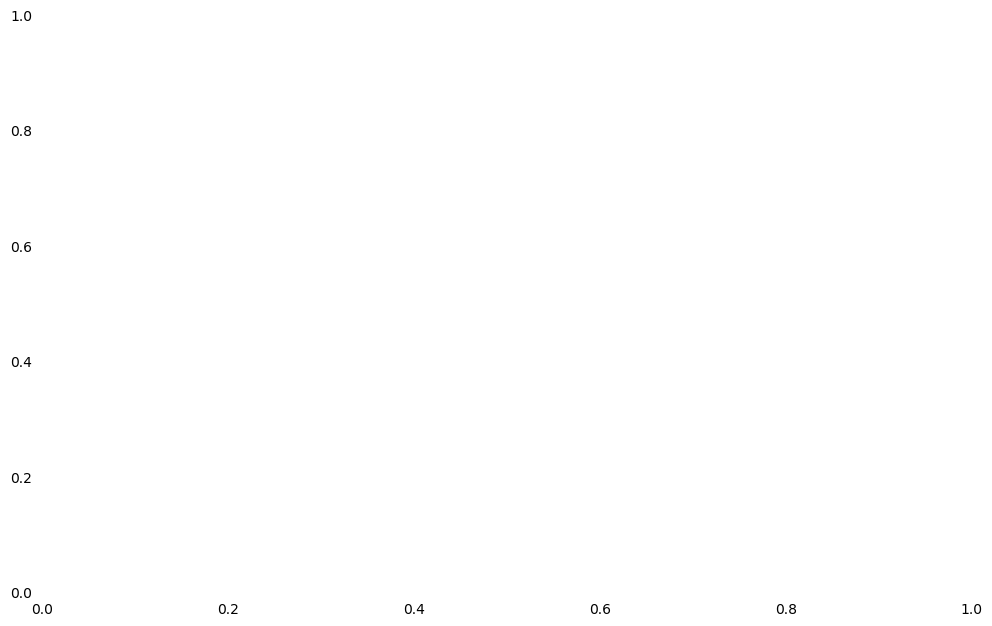

In [66]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12,7.5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
plt.plot(zoo_df[zoo_df['budtime']>0]['n'],zoo_df[zoo_df['budtime']>0]['budtime'],'o',label="Evenly Covered")
plt.plot(budNets[budNets['Mean Budding Time']>0]['Ligand Number'],budNets[budNets['Mean Budding Time']>0]['Mean Budding Time'],'o',label="Evolved")
plt.ylabel('Budding Time',fontsize=16)
plt.xlabel("Ligand Number",fontsize=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
plt.ylim(0,25000)
plt.legend(fontsize=16)
plt.show()

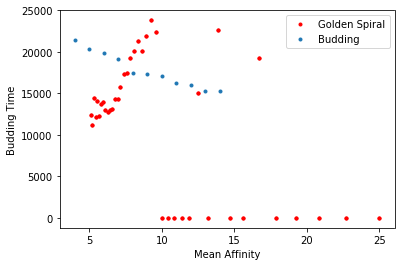

In [26]:
plt.plot(zoo_df['e'],zoo_df['budtime'],'.',label="Golden Spiral",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Mean Budding Time'],'.',label="Budding")
plt.ylabel('Budding Time')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

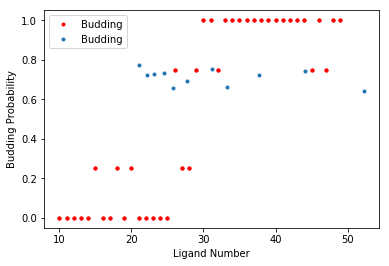

In [27]:
plt.plot(zoo_df['n'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Ligand Number'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Ligand Number")
plt.legend()
plt.show()

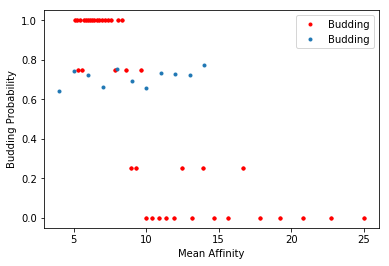

In [28]:
plt.plot(zoo_df['e'],zoo_df['bud_rate'],'.',label="Budding",color="red")
plt.plot(budNets['Mean Affinity'],budNets['Budding Rate'],'.',label="Budding")
plt.ylabel('Budding Probability')
plt.xlabel("Mean Affinity")
plt.legend()
plt.show()

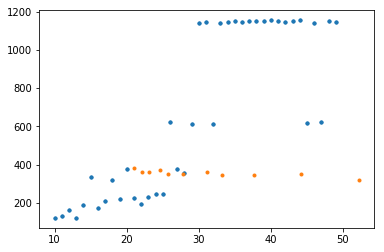

In [29]:
plt.plot(zoo_df['n'],zoo_df['fitness'],'.',label="Budding")
plt.plot(budNets['Ligand Number'],budNets['Fitness'],'.',label="Budding")

In [70]:
# net_df[(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10)].sort_values("Subgraph Number")

In [71]:

net_df[(net_df['Fitness']==158.750000)&(net_df['Ligand Number']==23) & (net_df['Mean Affinity']==10) ].sort_values(["Subgraph Number","Density"])



,Ligand Number,Mean Affinity,Fitness,Mean Budding Time,Budding Rate,Density,Max Diameter,Mean Diameter,Min Diameter,Min Radius,...,Max Average Shortest Path,Mean Average Shortest Path,Min Average Shortest Path,Subgraph Number,Estrada Coefficient,Pruning,Max SmallWorld,Mean SmallWorld,Min SmallWorld,Clustering Coefficient
2109,23,10.0,158.75,-1.0,0.0,0.162055,4,3.0,2,1,...,1.933333,1.57963,1.333333,3,218.644226,0.3,3.432343,1.97378,1.118906,0.566253


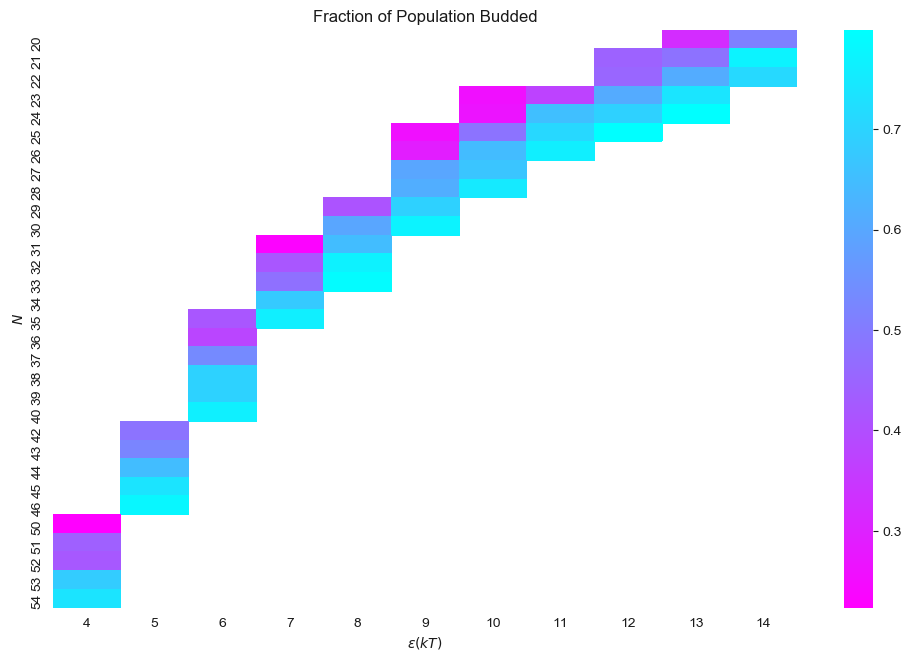

In [73]:
plt.figure(figsize=(12,7.5))
result = bud_df.pivot(index='e', columns='n', values='bud_percentage')
sns.heatmap(result,cmap='cool_r')
plt.title('Fraction of Population Budded')
plt.xlabel("$\epsilon (kT)$")
plt.ylabel("$N$")
sns.set(font_scale=2.1)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
    
plt.show()

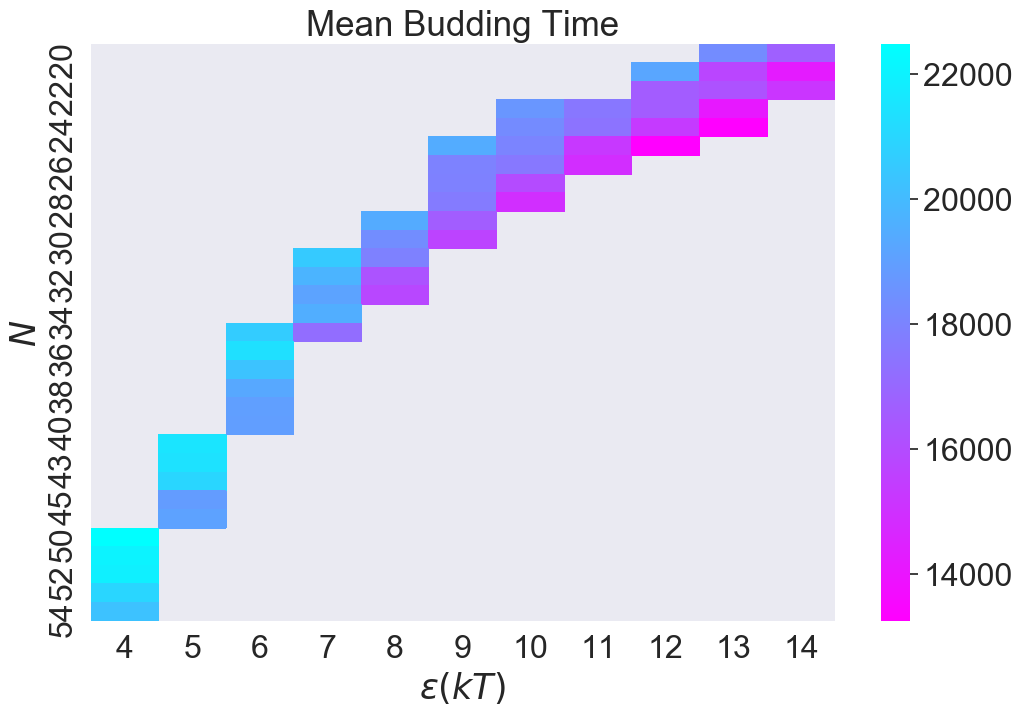

In [74]:
plt.figure(figsize=(12,7.5))
result = bud_df[bud_df['mean_budtime']>0].pivot(index='e', columns='n', values='mean_budtime')
sns.heatmap(result,cmap='cool_r')
plt.title('Mean Budding Time')
plt.xlabel("$\epsilon (kT)$")
plt.ylabel("$N$")
sns.set(font_scale=2.1)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on") 
    
plt.show()

In [76]:
spec_df = pd.read_csv('/Users/joelforster/Projects/optihedron/opti-spectrum.csv')

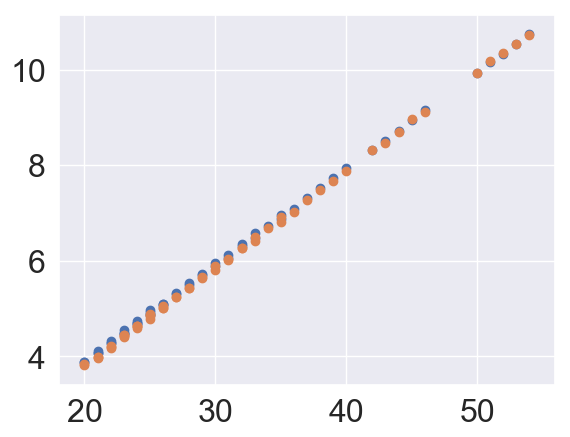

In [78]:
cR = [[20, 13], [20, 14], [21, 12], [21, 13], [21, 14], [22, 12], [22, 13], [22, 14], [23, 10], [23, 11], [23, 12], [23, 13], [24, 10], [24, 11], [24, 12], [24, 13], [25, 9], [25, 10], [25, 11], [25, 12], [26, 9], [26, 10], [26, 11], [27, 9], [27, 10], [28, 9], [28, 10], [29, 8], [29, 9], [30, 8], [30, 9], [31, 7], [31, 8], [32, 7], [32, 8], [33, 7], [33, 8], [34, 7], [35, 6], [35, 7], [36, 6], [37, 6], [38, 6], [39, 6], [40, 6], [42, 5], [43, 5], [44, 5], [45, 5], [46, 5], [50, 4], [51, 4], [52, 4], [53, 4], [54, 4]]
bRadMean = []
nRadMean = []
specAvgs = {}
for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bspec = []
    nspec = []
    brad = []
    nrad = []
    for spec in s[s['budtime']>-1]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        bspec.append(speclist)
        brad.append(max(speclist))
    for spec in s[s['budtime']<0]['spectrum'].values.tolist():
        speclist = [float(eig) for eig in spec[1:len(spec)-1].split(',')]
        nspec.append(speclist)
        nrad.append(max(speclist))
    if not c[0] in specAvgs:
        specAvgs[c[0]]={}
    specAvgs[c[0]][c[-1]] = {}
    specAvgs[c[0]][c[-1]]['b'] = np.mean(bspec, axis=0, dtype=None, out=None, keepdims=False)
    specAvgs[c[0]][c[-1]]['n'] = np.mean(nspec, axis=0, dtype=None, out=None, keepdims=False)
#     sns.distplot(nrad,bins=np.linspace(min(nrad),max(nrad),40),kde=False,norm_hist=True)
#     sns.distplot(brad,bins=np.linspace(min(brad),max(brad),40),kde=False,norm_hist=True)
    bRadMean.append([c[0],c[1],np.mean(brad)])
    nRadMean.append([c[0],c[1],np.mean(nrad)])
plt.scatter([i[0] for i in nRadMean],[i[2] for i in nRadMean])
plt.scatter([i[0] for i in bRadMean],[i[2] for i in bRadMean])

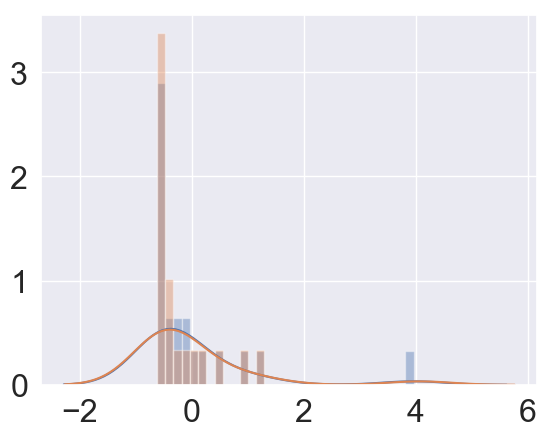

In [79]:
se = 12
sn = 21

sns.distplot(specAvgs[sn][se]['b'],bins=np.linspace(np.min(specAvgs[sn][se]['b']),np.max(specAvgs[sn][se]['b']),32),norm_hist=True)
sns.distplot(specAvgs[sn][se]['n'],bins=np.linspace(np.min(specAvgs[sn][se]['b']),np.max(specAvgs[sn][se]['b']),32),norm_hist=True)

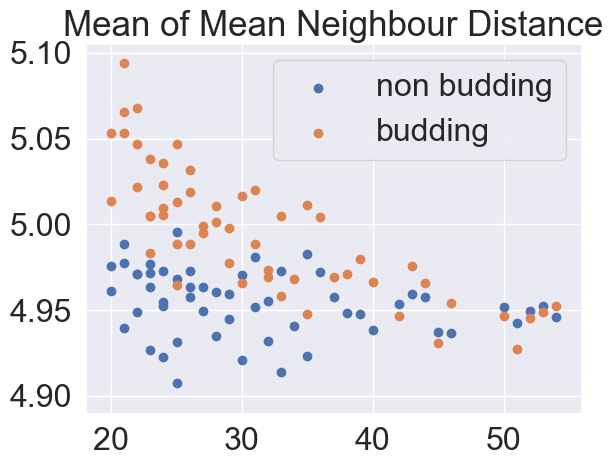

In [80]:
nDistMean = []
bDistMean = []
nDistMin = []
bDistMin = []
nDistMax = []
bDistMax = []
for c in cR:
    s = spec_df[(spec_df['e']==float(c[-1])) & (spec_df['n']==float(c[0]))]
    bdist = []
    ndist = []
    for dist in s[s['budtime']>-1]['mean_dist'].values.tolist():
        fdist = float(dist)
        bdist.append(fdist)
    for dist in s[s['budtime']<0]['mean_dist'].values.tolist():
        fdist = float(dist)
        ndist.append(fdist)
    nDistMean.append([c[0],c[1],1.0/np.mean(ndist)])
    bDistMean.append([c[0],c[1],1.0/np.mean(bdist)])
    nDistMin.append([c[0],c[1],1.0/np.min(ndist)])
    bDistMin.append([c[0],c[1],1.0/np.min(bdist)])
    nDistMax.append([c[0],c[1],1.0/np.max(ndist)])
    bDistMax.append([c[0],c[1],1.0/np.max(bdist)])

# sns.distplot(ndist,bins=np.linspace(min(ndist),max(ndist),40),kde=False,norm_hist=True)
# sns.distplot(bdist,bins=np.linspace(min(bdist),max(bdist),40),kde=False,norm_hist=True)

plt.scatter([i[0] for i in nDistMean],[i[2] for i in nDistMean],label='non budding')
plt.scatter([i[0] for i in bDistMean],[i[2] for i in bDistMean],label='budding')
plt.title('Mean of Mean Neighbour Distance')
plt.legend()
plt.show()

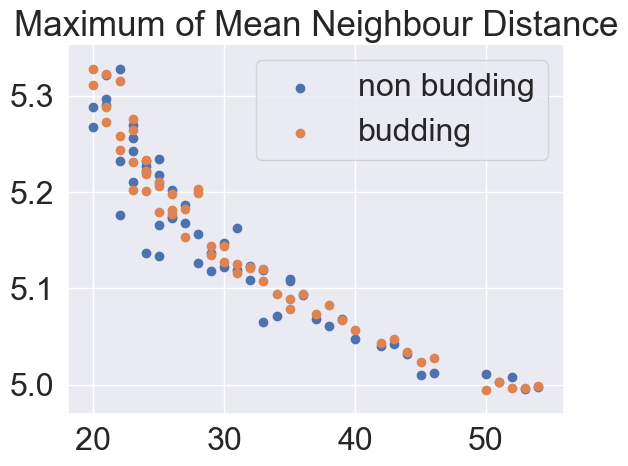

In [81]:
plt.scatter([i[0] for i in nDistMin],[i[2] for i in nDistMin],label='non budding')
plt.scatter([i[0] for i in bDistMin],[i[2] for i in bDistMin],label='budding')
plt.title('Maximum of Mean Neighbour Distance')
plt.legend()
plt.show()

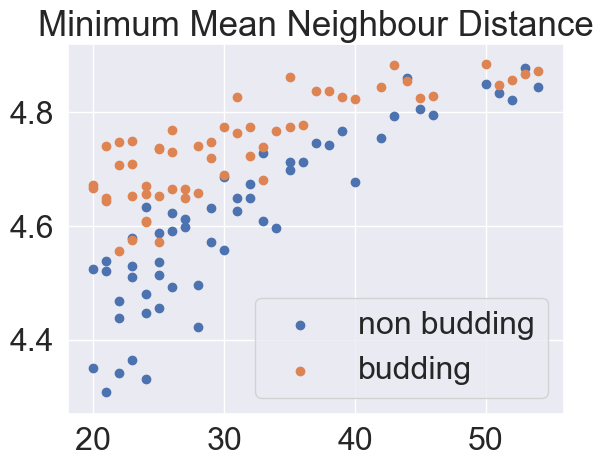

In [82]:
plt.scatter([i[0] for i in nDistMax],[i[2] for i in nDistMax],label='non budding')
plt.scatter([i[0] for i in bDistMax],[i[2] for i in bDistMax],label='budding')
plt.title('Minimum Mean Neighbour Distance')
plt.legend()
plt.show()